In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [364]:
df = pd.read_excel("Data_Train.xlsx")

In [365]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [367]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### Convert all the time stamps to numerical values

In [368]:
df["Departure_hour"]=df["Dep_Time"].str.split(":").str[0].astype(int)

In [369]:
df["Departure_minutes"]=df["Dep_Time"].str.split(":").str[1].astype(int)

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Date_of_Journey    10683 non-null  object
 2   Source             10683 non-null  object
 3   Destination        10683 non-null  object
 4   Route              10682 non-null  object
 5   Dep_Time           10683 non-null  object
 6   Arrival_Time       10683 non-null  object
 7   Duration           10683 non-null  object
 8   Total_Stops        10682 non-null  object
 9   Additional_Info    10683 non-null  object
 10  Price              10683 non-null  int64 
 11  Departure_hour     10683 non-null  int32 
 12  Departure_minutes  10683 non-null  int32 
dtypes: int32(2), int64(1), object(10)
memory usage: 1001.7+ KB


In [371]:
df.drop("Dep_Time", axis=1, inplace=True)

In [372]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Departure_hour,Departure_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,50


In [373]:
df["Arrival_Time"] = df["Arrival_Time"].apply(lambda x:x.split(" ")[0])

In [374]:
df["Arrival_Hour"]=df["Arrival_Time"].str.split(":").str[0].astype(int)

In [375]:
df["Arrival_Minute"]=df["Arrival_Time"].str.split(":").str[1].astype(int)

In [376]:
df.drop("Arrival_Time", axis=1,inplace=True)

In [377]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Departure_hour,Departure_minutes,Arrival_Hour,Arrival_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,50,13,15


In [378]:
df["Journey_Date"]=df["Date_of_Journey"].str.split("/").str[0].astype(int)
df["Journey_Month"]=df["Date_of_Journey"].str.split("/").str[1].astype(int)
df["Journey_year"]=df["Date_of_Journey"].str.split("/").str[2].astype(int)

In [379]:
df.drop("Date_of_Journey", axis=1, inplace=True)

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Route              10682 non-null  object
 4   Duration           10683 non-null  object
 5   Total_Stops        10682 non-null  object
 6   Additional_Info    10683 non-null  object
 7   Price              10683 non-null  int64 
 8   Departure_hour     10683 non-null  int32 
 9   Departure_minutes  10683 non-null  int32 
 10  Arrival_Hour       10683 non-null  int32 
 11  Arrival_Minute     10683 non-null  int32 
 12  Journey_Date       10683 non-null  int32 
 13  Journey_Month      10683 non-null  int32 
 14  Journey_year       10683 non-null  int32 
dtypes: int32(7), int64(1), object(7)
memory usage: 959.9+ KB


In [381]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Departure_hour,Departure_minutes,Arrival_Hour,Arrival_Minute,Journey_Date,Journey_Month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,20,1,10,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,50,13,15,1,5,2019


In [382]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [383]:
df.Total_Stops.mode() #replace nan with mode value

0    1 stop
Name: Total_Stops, dtype: object

In [384]:
df["Total_Stops"] = df["Total_Stops"].map({"non-stop":0,
                                            "2 stops":2,
                                            "1 stop": 1,
                                            "3 stops": 3,
                                            "4 stops": 4,
                                            np.nan: 1})

In [385]:
df.Total_Stops.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [386]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Departure_hour,Departure_minutes,Arrival_Hour,Arrival_Minute,Journey_Date,Journey_Month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,22,20,1,10,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,5,50,13,15,1,5,2019


In [387]:
#remove route since we already have stop count because in flight price increase as the count of stop increases
df.drop("Route", axis=1, inplace=True)

In [388]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Departure_hour,Departure_minutes,Arrival_Hour,Arrival_Minute,Journey_Date,Journey_Month,Journey_year
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,22,20,1,10,24,3,2019
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,5,50,13,15,1,5,2019


In [389]:

df.Additional_Info.value_counts()


No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [390]:
#Since there is no much information in Additional_info column lets drop it
df.drop("Additional_Info", axis=1,inplace=True)

In [391]:
df["Duration_hours"]=df["Duration"].str.split(" ").str[0]


In [392]:
df["Duration_hours"].unique()
#we can see in the unique values of hours there is a values called "5m" which means journey in 5 minutes but that is not possible
#so lets see what it is and fix it

array(['2h', '7h', '19h', '5h', '4h', '15h', '21h', '25h', '13h', '12h',
       '26h', '22h', '23h', '20h', '10h', '6h', '11h', '8h', '16h', '3h',
       '27h', '1h', '14h', '9h', '18h', '17h', '24h', '30h', '28h', '29h',
       '37h', '34h', '38h', '35h', '36h', '47h', '33h', '32h', '31h',
       '42h', '39h', '5m', '41h', '40h'], dtype=object)

In [393]:
df[df["Duration_hours"] == "5m"]
#since there is huge data inadequacy here lets drop this column

,Airline,Source,Destination,Duration,Total_Stops,Price,Departure_hour,Departure_minutes,Arrival_Hour,Arrival_Minute,Journey_Date,Journey_Month,Journey_year,Duration_hours
6474,Air India,Mumbai,Hyderabad,5m,2,17327,16,50,16,55,6,3,2019,5m


In [394]:
df.drop([6474], axis=0, inplace=True)
df.reset_index(drop=True,inplace=True) #alway remember to reset the index if a row is dropped

In [395]:
df["Duration_hours"]=df.Duration_hours.str.replace("h", '').astype(int)

In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Duration           10682 non-null  object
 4   Total_Stops        10682 non-null  int64 
 5   Price              10682 non-null  int64 
 6   Departure_hour     10682 non-null  int32 
 7   Departure_minutes  10682 non-null  int32 
 8   Arrival_Hour       10682 non-null  int32 
 9   Arrival_Minute     10682 non-null  int32 
 10  Journey_Date       10682 non-null  int32 
 11  Journey_Month      10682 non-null  int32 
 12  Journey_year       10682 non-null  int32 
 13  Duration_hours     10682 non-null  int32 
dtypes: int32(8), int64(2), object(4)
memory usage: 834.7+ KB


In [397]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Departure_hour,Departure_minutes,Arrival_Hour,Arrival_Minute,Journey_Date,Journey_Month,Journey_year,Duration_hours
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,22,20,1,10,24,3,2019,2
1,Air India,Kolkata,Banglore,7h 25m,2,7662,5,50,13,15,1,5,2019,7
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,25,4,25,9,6,2019,19
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,18,5,23,30,12,5,2019,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,16,50,21,35,1,3,2019,4


In [398]:
#convert duration to minutes
df.Duration.unique()
duration_min = []
#example outputs: 2h 50m, 15h, 55m
for dur_str in df.Duration:
    duration = 0
    dur_list = dur_str.split(" ")
#     print(dur_list)
    for item in dur_list:
        if "h" in item:
            item = item.replace("h","")
            duration += (int(item)*60)
        elif "m" in item:
            item = item.replace("m","")
            duration += int(item)
    duration_min.append(duration)

df["Duration_minutes"] = duration_min

In [399]:
# Using list comprehension for a more compact solution
# df["Duration_minutes"] = df["Duration"].apply(lambda dur_str: sum(
#     [int(item.replace("h", "")) * 60 if "h" in item else int(item.replace("m", "")) for item in dur_str.split()]
# ))


In [400]:
df.drop("Duration", axis=1, inplace=True)


In [401]:
df.drop("Duration_hours",axis=1, inplace=True)

#since we have accurate minutes let's drop hours column

In [402]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Departure_hour,Departure_minutes,Arrival_Hour,Arrival_Minute,Journey_Date,Journey_Month,Journey_year,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,22,20,1,10,24,3,2019,170
1,Air India,Kolkata,Banglore,2,7662,5,50,13,15,1,5,2019,445
2,Jet Airways,Delhi,Cochin,2,13882,9,25,4,25,9,6,2019,1140
3,IndiGo,Kolkata,Banglore,1,6218,18,5,23,30,12,5,2019,325
4,IndiGo,Banglore,New Delhi,1,13302,16,50,21,35,1,3,2019,285


In [403]:
#Hot encoding of Airline, Source, Destination

In [404]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [405]:
#for source and destination use one hot encoder and for AIrline use label encoder
one_host_encoder = OneHotEncoder()


In [406]:
one_host_encoder.fit_transform(df[["Source","Destination"]]).toarray()

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [407]:
one_host_encoder.get_feature_names_out()

array(['Source_Banglore', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Banglore',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'], dtype=object)

In [408]:
df_one_host_endcoder = pd.DataFrame(one_host_encoder.fit_transform(df[["Source","Destination"]]).toarray(),columns=one_host_encoder.get_feature_names_out())

In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Total_Stops        10682 non-null  int64 
 4   Price              10682 non-null  int64 
 5   Departure_hour     10682 non-null  int32 
 6   Departure_minutes  10682 non-null  int32 
 7   Arrival_Hour       10682 non-null  int32 
 8   Arrival_Minute     10682 non-null  int32 
 9   Journey_Date       10682 non-null  int32 
 10  Journey_Month      10682 non-null  int32 
 11  Journey_year       10682 non-null  int32 
 12  Duration_minutes   10682 non-null  int64 
dtypes: int32(7), int64(3), object(3)
memory usage: 792.9+ KB


In [410]:
df = pd.concat([df,df_one_host_endcoder],axis=1)

In [411]:
# This can be done
# label_encoder = LabelEncoder()
# df["Airline"]=label_encoder.fit_transform(df["Airline"])

In [412]:
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [413]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [414]:
df[df["Airline"] == "Trujet"]

,Airline,Source,Destination,Total_Stops,Price,Departure_hour,Departure_minutes,Arrival_Hour,Arrival_Minute,Journey_Date,Journey_Month,Journey_year,Duration_minutes,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
2878,Trujet,Mumbai,Hyderabad,1,4140,13,5,16,20,6,3,2019,195,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [415]:
frequency = df['Airline'].value_counts()
frequency

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [416]:
#to do target encoding using mean (we can do it median, mode also)
airline_mean = df.groupby("Airline")["Price"].mean()
airline_mean

Airline
Air Asia                              5590.260188
Air India                             9606.804112
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

In [417]:
df.drop(["Source", "Destination"], axis=1, inplace=True)

In [418]:
df.head()

,Airline,Total_Stops,Price,Departure_hour,Departure_minutes,Arrival_Hour,Arrival_Minute,Journey_Date,Journey_Month,Journey_year,Duration_minutes,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,0,3897,22,20,1,10,24,3,2019,170,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Air India,2,7662,5,50,13,15,1,5,2019,445,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Jet Airways,2,13882,9,25,4,25,9,6,2019,1140,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,IndiGo,1,6218,18,5,23,30,12,5,2019,325,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,IndiGo,1,13302,16,50,21,35,1,3,2019,285,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [419]:
pd.set_option('display.max_columns', None)

In [420]:
#here I am using target encoding to encode airline column. NOTE: do target encoding only after spliting the train and test data to eliminate data leakage
airline_mean = df.groupby("Airline")["Price"].mean().round(2)

In [421]:
df["Airline"] = df["Airline"].map(airline_mean)

In [422]:
df.head()

,Airline,Total_Stops,Price,Departure_hour,Departure_minutes,Arrival_Hour,Arrival_Minute,Journey_Date,Journey_Month,Journey_year,Duration_minutes,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,5673.68,0,3897,22,20,1,10,24,3,2019,170,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,9606.80,2,7662,5,50,13,15,1,5,2019,445,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,11643.92,2,13882,9,25,4,25,9,6,2019,1140,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,5673.68,1,6218,18,5,23,30,12,5,2019,325,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5673.68,1,13302,16,50,21,35,1,3,2019,285,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [423]:
#write back the cleaned data to a csv file
df.to_csv("cleaned_flight_data.csv",index=False)

In [424]:
df[["Airline","Total_Stops", "Price"]].corr()

,Airline,Total_Stops,Price
Airline,1.000000,0.430955,0.641071
Total_Stops,0.430955,1.000000,0.603768
Price,0.641071,0.603768,1.000000


In [425]:
df[['Price', 'Total_Stops', 'Departure_hour', 'Departure_minutes', 
                         'Arrival_Hour', 'Arrival_Minute', 'Journey_Date', 'Journey_Month', 
                         'Journey_year', 'Duration_minutes']].corr()

,Price,Total_Stops,Departure_hour,Departure_minutes,Arrival_Hour,Arrival_Minute,Journey_Date,Journey_Month,Journey_year,Duration_minutes
Price,1.000000,0.603768,0.006718,-0.024726,0.024203,-0.086489,-0.153619,-0.103431,NaN,0.506695
Total_Stops,0.603768,1.000000,-0.061599,-0.002814,0.038066,-0.107270,-0.009329,0.054642,NaN,0.738389
Departure_hour,0.006718,-0.061599,1.000000,-0.024887,0.005193,0.067816,0.002271,0.039201,NaN,0.002073
Departure_minutes,-0.024726,-0.002814,-0.024887,1.000000,0.043008,-0.017833,-0.008149,-0.059062,NaN,-0.018781
Arrival_Hour,0.024203,0.038066,0.005193,0.043008,1.000000,-0.154453,-0.003160,-0.003889,NaN,0.051484
Arrival_Minute,-0.086489,-0.107270,0.067816,-0.017833,-0.154453,1.000000,-0.017362,-0.100399,NaN,-0.069453
Journey_Date,-0.153619,-0.009329,0.002271,-0.008149,-0.003160,-0.017362,1.000000,-0.038505,NaN,-0.022669
Journey_Month,-0.103431,0.054642,0.039201,-0.059062,-0.003889,-0.100399,-0.038505,1.000000,NaN,0.014700
Journey_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration_minutes,0.506695,0.738389,0.002073,-0.018781,0.051484,-0.069453,-0.022669,0.014700,NaN,1.000000


In [426]:
df["Journey_year"].unique()

array([2019])

In [427]:
##By looking in the unique_values of 'Journey_year' which is only 2019. Since it is only a single values and the corelation is calculated based on
##Variance of the data. Since it does not have any varience the correlation is NaN with other feature.
## Also we can safely drop that column
df.drop("Journey_year", axis=1, inplace=True)

In [428]:
df.head()

,Airline,Total_Stops,Price,Departure_hour,Departure_minutes,Arrival_Hour,Arrival_Minute,Journey_Date,Journey_Month,Duration_minutes,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,5673.68,0,3897,22,20,1,10,24,3,170,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,9606.80,2,7662,5,50,13,15,1,5,445,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,11643.92,2,13882,9,25,4,25,9,6,1140,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,5673.68,1,6218,18,5,23,30,12,5,325,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5673.68,1,13302,16,50,21,35,1,3,285,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [429]:
#check correlation of numeric features first
df[['Price', 'Total_Stops', 'Departure_hour', 'Departure_minutes', 
    'Arrival_Hour', 'Arrival_Minute', 'Journey_Date', 'Journey_Month', 
    'Duration_minutes']].corr()

,Price,Total_Stops,Departure_hour,Departure_minutes,Arrival_Hour,Arrival_Minute,Journey_Date,Journey_Month,Duration_minutes
Price,1.000000,0.603768,0.006718,-0.024726,0.024203,-0.086489,-0.153619,-0.103431,0.506695
Total_Stops,0.603768,1.000000,-0.061599,-0.002814,0.038066,-0.107270,-0.009329,0.054642,0.738389
Departure_hour,0.006718,-0.061599,1.000000,-0.024887,0.005193,0.067816,0.002271,0.039201,0.002073
Departure_minutes,-0.024726,-0.002814,-0.024887,1.000000,0.043008,-0.017833,-0.008149,-0.059062,-0.018781
Arrival_Hour,0.024203,0.038066,0.005193,0.043008,1.000000,-0.154453,-0.003160,-0.003889,0.051484
Arrival_Minute,-0.086489,-0.107270,0.067816,-0.017833,-0.154453,1.000000,-0.017362,-0.100399,-0.069453
Journey_Date,-0.153619,-0.009329,0.002271,-0.008149,-0.003160,-0.017362,1.000000,-0.038505,-0.022669
Journey_Month,-0.103431,0.054642,0.039201,-0.059062,-0.003889,-0.100399,-0.038505,1.000000,0.014700
Duration_minutes,0.506695,0.738389,0.002073,-0.018781,0.051484,-0.069453,-0.022669,0.014700,1.000000


In [430]:
sns.set_style('whitegrid')

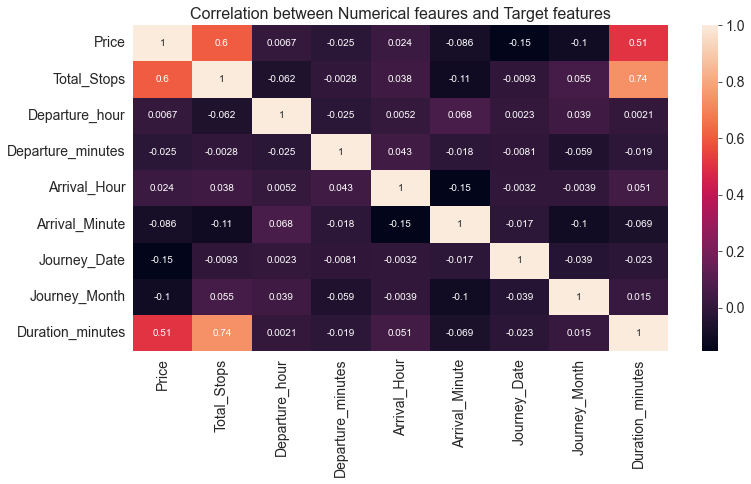

In [431]:
#plot heatmap for all numberic feature
plt.figure(figsize=(12,6))
sns.heatmap(df[['Price', 'Total_Stops', 'Departure_hour', 'Departure_minutes', 
    'Arrival_Hour', 'Arrival_Minute', 'Journey_Date', 'Journey_Month', 
    'Duration_minutes']].corr(), annot=True)
plt.title("Correlation between Numerical feaures and Target features", fontsize=16);

In [432]:
plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['figure.titlesize'] = "large"
plt.rcParams['axes.labelsize'] = 16 
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['text.color'] = 'black'

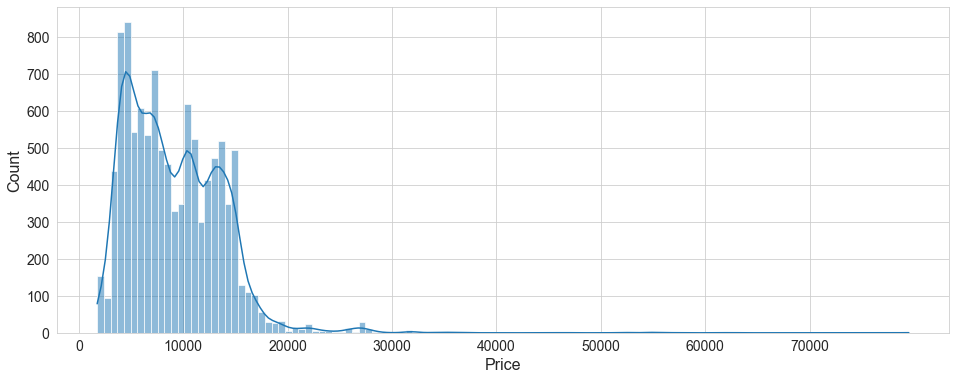

In [433]:
#histograph with respect to total stops and prices
sns.histplot(df['Price'], kde=True);
plt.xticks(range(0,80000,10000));

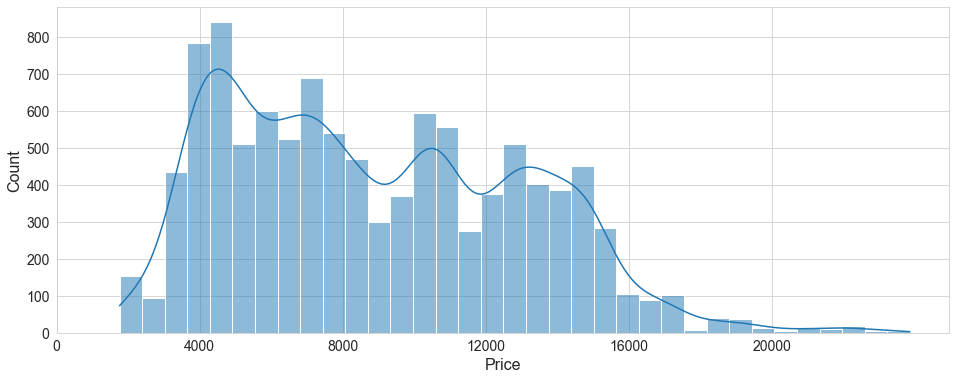

In [434]:
#let's check for data when price is less than 24000
sns.histplot(df[df["Price"]<24000]["Price"], kde=True);
plt.xticks(range(0,24000,4000));

C:\Users\Srikanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


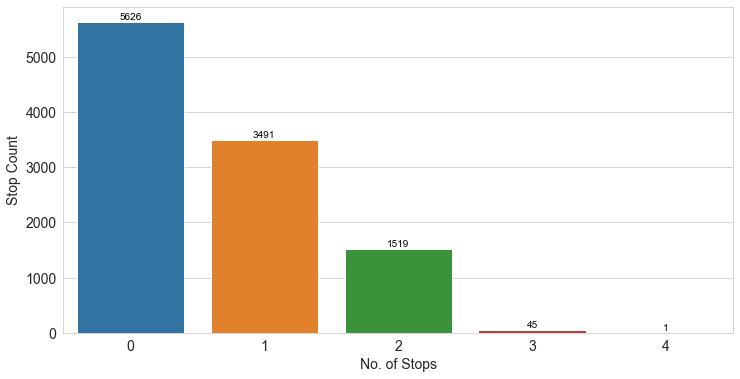

In [435]:
#plot bar plot for total_stops
plt.figure(figsize=(12,6))
sns.barplot(np.arange(5),df["Total_Stops"].value_counts())
plt.xlabel("No. of Stops", fontsize = 14)
plt.ylabel("Stop Count", fontsize = 14);
#print stop count at the top of bar
for index, value in enumerate(df["Total_Stops"].value_counts()):
    plt.text(index, value + 50, str(value), ha='center')

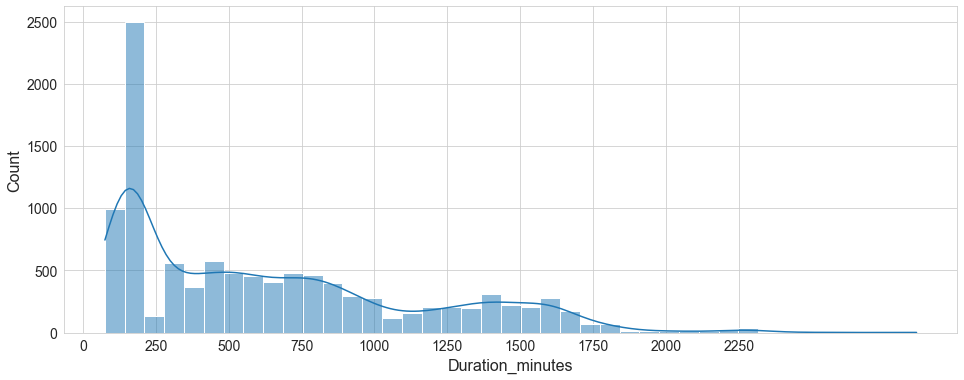

In [436]:
#Flight Duration(min) histograph 
plt.figure(figsize=(16,6))
sns.histplot(df["Duration_minutes"],kde=True,);
plt.xticks(range(0,2500,250));

<AxesSubplot: xlabel='Duration_minutes', ylabel='Price'>

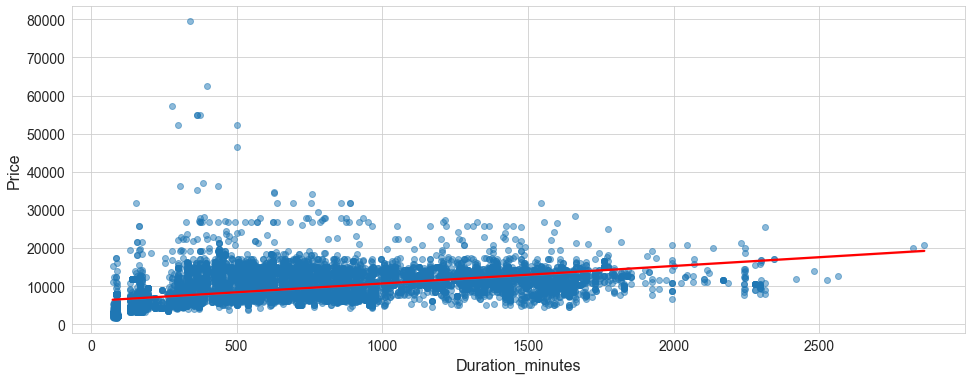

In [437]:
#plot with scatter and regression relation between DUration_minute and "Price"
sns.regplot(x='Duration_minutes', y='Price', data=df, 
            scatter_kws={'alpha': 0.5},   # Scatter plot settings
            line_kws={'color': 'red'}) # line plot settings


### Observations 1:
From the correlation of numeric features
1. We can see that the price(target variable) has good correlation with feature "Total_stops", "Duration_minutes".
2. But a general understanding of Flight prices we can believe that the price also depends on "Departure_hour" and "Journey_date" and "Journey_month"
3. Also by looking into the histograph of price feature we can see that the target feature is skewed to left and there is a high possibility of outliers.
4. Duration of Flight in minutes is also skewed to left, which is an expected behaviour. Also there are few outliner in "DUration_Minutes" feature which can be dropped.
5. The count of total stops less than or equal 2 (<=2 stops) is very low. In general we can say that most of the trips only have No stops or One stop.
6. By looking at the scatter plot(regplot) between "Duration_minute" and "Price" feature, we can see a linear increase in price as the duration of journey increases. 


In [438]:
#let's see mean values price with respect to each month, date and hour
price_mean_by_departure_hour = df.groupby("Departure_hour")["Price"].mean().round(2)
price_mean_by_journey_date = df.groupby("Journey_Date")["Price"].mean().round(2)
price_mean_by_journey_month = df.groupby("Journey_Month")["Price"].mean().round(2)

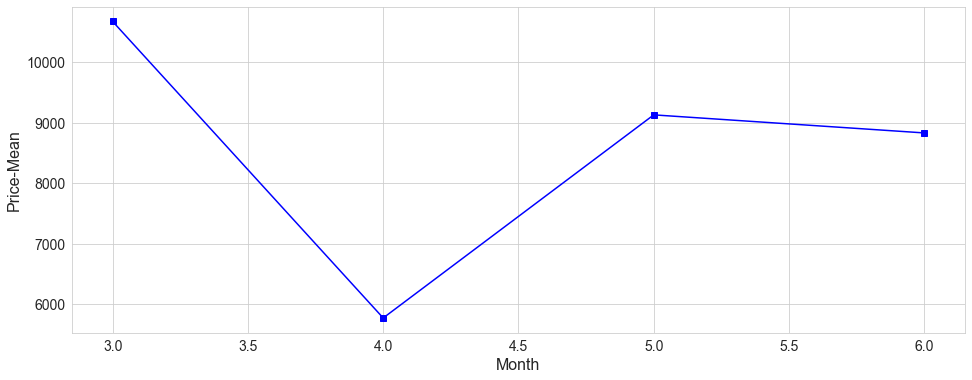

<Figure size 576x288 with 0 Axes>

In [439]:
#let's vizualize the price means with each feature
plt.plot(price_mean_by_journey_month,'s-b')
plt.xlabel("Month")
plt.ylabel("Price-Mean")
plt.figure(figsize = (8,4));

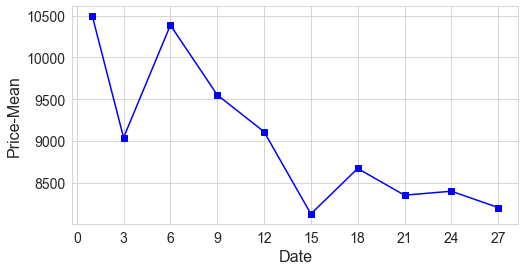

In [440]:
plt.figure(figsize = (8,4))
plt.plot(price_mean_by_journey_date,'s-b')
plt.xlabel("Date")
plt.ylabel("Price-Mean")
plt.xticks(range(0,30,3));

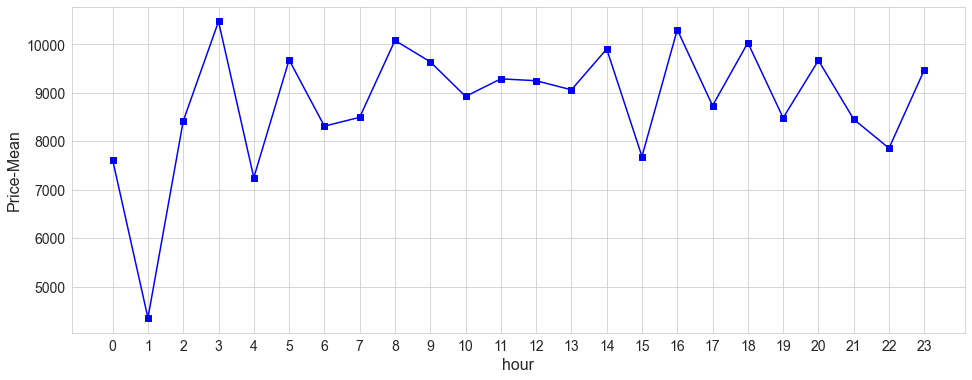

In [441]:
plt.figure(figsize = (16,6))

plt.plot(price_mean_by_departure_hour,'s-b')
plt.xlabel("hour")
plt.ylabel("Price-Mean")
plt.xticks(range(24));

In [442]:
#let's group month and date together to see how the price is impacted
price_mean_by_month_and_date = df.groupby(['Journey_Month','Journey_Date'])["Price"].mean().round(2).reset_index()

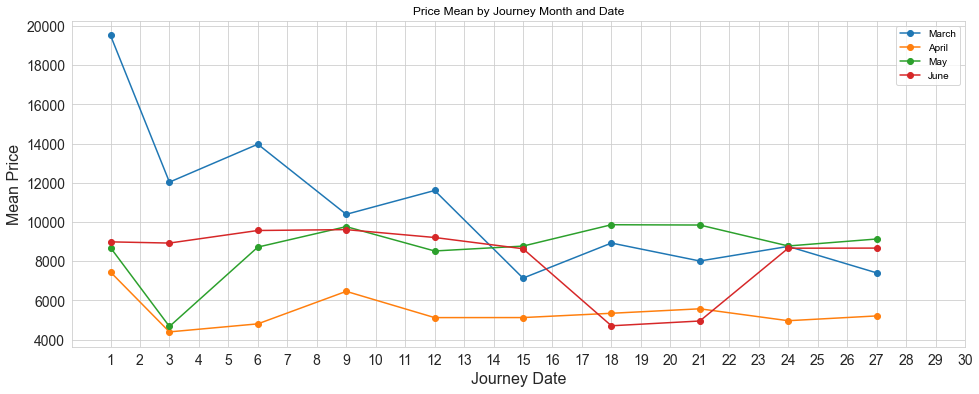

In [443]:
##Plot by each month
month_name = {3: "March", 4: "April", 5: "May", 6: "June"}
plt.figure(figsize = (16,6))
for month in price_mean_by_month_and_date['Journey_Month'].unique():
    # Filter data for the specific month
    monthly_data = price_mean_by_month_and_date[price_mean_by_month_and_date['Journey_Month'] == month]
    plt.plot(monthly_data['Journey_Date'], monthly_data['Price'], label=f'{month_name[month]}', marker='o')
plt.xlabel("Journey Date")
plt.ylabel("Mean Price")
plt.title("Price Mean by Journey Month and Date")

plt.legend()
plt.xticks(ticks=range(1, 31));

## Observation 2:
Gap in data:
1. The data is only present for months (March, April, May and June)
2. Dates (1,3,6,9,12,15,18,21,24,27)
3. Year: 2019

Based on the graphs:   
1. Based on the graphs, I can say that prices are higher at the beginning of the month when compared to the end of the month
2. Prices are slightly lower after midnight around 1 AM, but overall, the prices remain in the same range throughout the day.
3. Based on the date and month grouping, we can say that the prices are evenly distributed. However, due to the high prices in March, there is a noticeable increase in the overall mean at the beginning of each month.

##### Finally, by examining all the plots related to price vs (Month, Date, Hour), we can observe a slight correlation between these features and "price"

### Correlation for categorical features

In [444]:
df.head()

,Airline,Total_Stops,Price,Departure_hour,Departure_minutes,Arrival_Hour,Arrival_Minute,Journey_Date,Journey_Month,Duration_minutes,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,5673.68,0,3897,22,20,1,10,24,3,170,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,9606.80,2,7662,5,50,13,15,1,5,445,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,11643.92,2,13882,9,25,4,25,9,6,1140,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,5673.68,1,6218,18,5,23,30,12,5,325,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5673.68,1,13302,16,50,21,35,1,3,285,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [445]:
#correlation with encoded source and desination columns with price
encoded_columns = [col for col in df.columns if "Source_" in col or "Destination_" in col]
df[["Price", "Airline"] + encoded_columns].corr()


,Price,Airline,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Price,1.000000,0.641071,-0.117960,-0.179211,0.270813,0.009480,-0.231568,0.009480,0.270813,-0.313388,-0.231568,-0.179211,0.189866
Airline,0.641071,1.000000,-0.086889,-0.218294,0.214308,-0.021806,-0.083717,-0.021806,0.214308,-0.150032,-0.083717,-0.218294,0.047331
Source_Banglore,-0.117960,-0.086889,1.000000,-0.097862,-0.437233,-0.308498,-0.134338,-0.308498,-0.437233,0.720278,-0.134338,-0.097862,0.607598
Source_Chennai,-0.179211,-0.218294,-0.097862,1.000000,-0.165252,-0.116597,-0.050773,-0.116597,-0.165252,-0.070487,-0.050773,1.000000,-0.059460
Source_Delhi,0.270813,0.214308,-0.437233,-0.165252,1.000000,-0.520939,-0.226847,-0.520939,1.000000,-0.314929,-0.226847,-0.165252,-0.265662
Source_Kolkata,0.009480,-0.021806,-0.308498,-0.116597,-0.520939,1.000000,-0.160056,1.000000,-0.520939,-0.222204,-0.160056,-0.116597,-0.187443
Source_Mumbai,-0.231568,-0.083717,-0.134338,-0.050773,-0.226847,-0.160056,1.000000,-0.160056,-0.226847,-0.096760,1.000000,-0.050773,-0.081623
Destination_Banglore,0.009480,-0.021806,-0.308498,-0.116597,-0.520939,1.000000,-0.160056,1.000000,-0.520939,-0.222204,-0.160056,-0.116597,-0.187443
Destination_Cochin,0.270813,0.214308,-0.437233,-0.165252,1.000000,-0.520939,-0.226847,-0.520939,1.000000,-0.314929,-0.226847,-0.165252,-0.265662
Destination_Delhi,-0.313388,-0.150032,0.720278,-0.070487,-0.314929,-0.222204,-0.096760,-0.222204,-0.314929,1.000000,-0.096760,-0.070487,-0.113317


Text(0.5, 1.0, 'Correlation between Categorical features and Target feature')

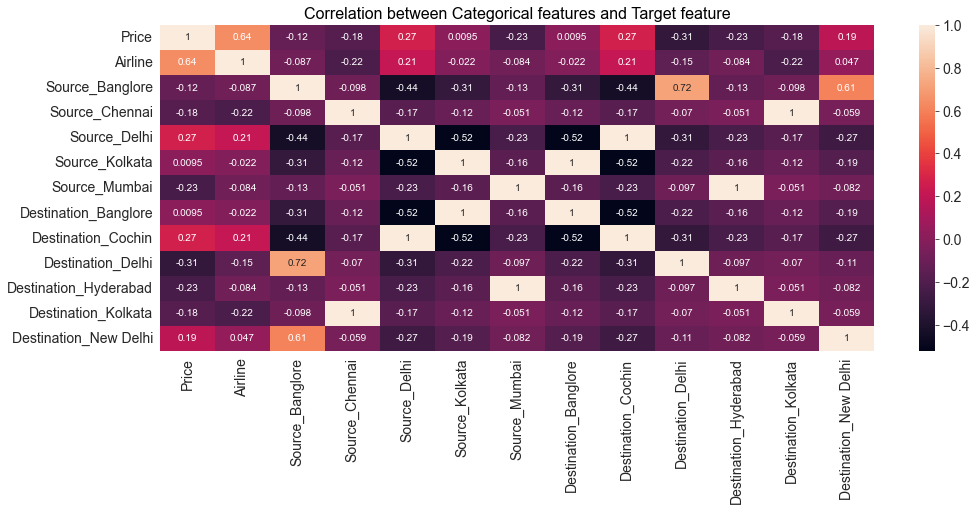

In [446]:
#plot heatmap with for Price wrt (Source and Destination)

sns.heatmap(df[["Price","Airline"] + encoded_columns].corr(),annot =True);
plt.title('Correlation between Categorical features and Target feature', fontsize=16)

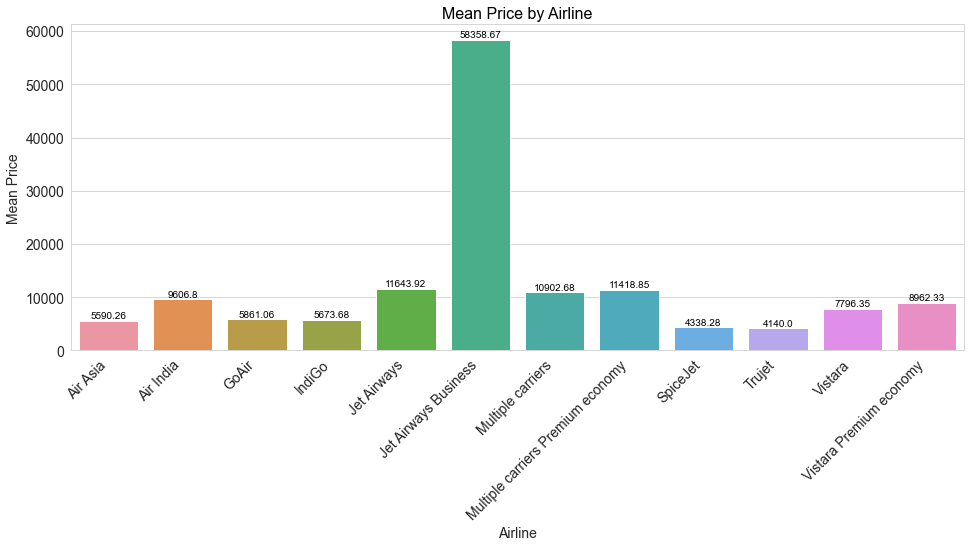

In [447]:
#plot a bar plot for the mean of price with respect to each airline

# airline_mean
sns.barplot(x=airline_mean.keys(), y=airline_mean.unique());
# sns.barplot(x=airline_mean.index, y=airline_mean.values);
plt.xticks(rotation=45, ha='right') 
plt.title('Mean Price by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Mean Price', fontsize=14);

for index, value in enumerate(airline_mean):
    plt.text(index,value+500, f"{value}", ha= "center")



In [448]:
airline_mean.sort_values()

Airline
Trujet                                4140.00
SpiceJet                              4338.28
Air Asia                              5590.26
IndiGo                                5673.68
GoAir                                 5861.06
Vistara                               7796.35
Vistara Premium economy               8962.33
Air India                             9606.80
Multiple carriers                    10902.68
Multiple carriers Premium economy    11418.85
Jet Airways                          11643.92
Jet Airways Business                 58358.67
Name: Price, dtype: float64

In [449]:
frequency

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

### Observation 3:
1. By analyzing the heatmap between the target feature and categorical features, we observe a positive correlation between the 'Airline' and 'Price' features. However, there is no significant correlation between any of the source or destination features and 'Price'.
2. 'Jet Airways Business' has the highest mean price, but its frequency is only 6. Similarly, 'Turjet' has the lowest mean price with a frequency of just 1. Since the frequencies of these entries are low, we cannot rely on their mean values to assess their overall position.
3. 'Jet Airways,' which has the highest frequency, has the second-highest mean flight price.